In [4]:
import os
import pandas as pd

base_dir = "../Data"
base_csv_path = os.path.join(base_dir, 'm4_imputed.csv')
assert os.path.exists(base_csv_path), f"{base_csv_path} does not exist"

df = pd.read_csv(base_csv_path)

In [5]:
#Print number of missing values in wl_tme
print(f'Number of missing values in wl_time: {df["wl_time"].isnull().sum()}')

#Print number of values in wl_time
print(f'Number of values in wl_time: {df["wl_time"].count()}')

wl_median = df['wl_time'].median()

#Print median for wl_time
print(f'Median for wl_time: {wl_median}')

#Code wl_time to 0 if wl_time is is less than the median else 1
df['wl_time'] = df['wl_time'].apply(lambda x: 0 if x < wl_median else 1)

#Print percentage of 0 and 1 in wl_time
print(f'Percentage of 0 and 1 in wl_time: \n{df["wl_time"].value_counts(normalize=True) * 100}')

#Print number of missing values in wl_time
print(f'Number of missing values in wl_time: {df["wl_time"].isnull().sum()}')

Number of missing values in wl_time: 0
Number of values in wl_time: 65107
Median for wl_time: 88.0
Percentage of 0 and 1 in wl_time: 
1    50.154361
0    49.845639
Name: wl_time, dtype: float64
Number of missing values in wl_time: 0


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

X = df.drop(['wl_time'], axis=1)
y = df['wl_time']

one_hot_cols = [col for col in df.columns if df[col].nunique() == 2]
columns_to_scale = [col for col in X.columns if col not in one_hot_cols]

scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

In [7]:
from sklearn.model_selection import cross_val_predict

log = LogisticRegression(max_iter=1000)
f1_scores = cross_val_score(log, X, y, cv=5, scoring='f1').mean()
print(f"F1 score pre feature selection: {f1_scores}")

f1_macro_scores = cross_val_score(log, X, y, cv=5, scoring='f1_macro').mean()
print(f"F1 macro score pre feature selection: {f1_macro_scores}")

F1 score pre feature selection: 0.694265549758162
F1 macro score pre feature selection: 0.6863939980707718


In [8]:
import numpy as np

log.fit(X, y)

# Get the coefficients (log odds) of the logistic regression model
coefficients = log.coef_[0]

# Calculate the odds ratio for each feature
odds_ratios = np.exp(coefficients)

# Display the odds ratio for each feature
for feature, odds_ratio in zip(X.columns, odds_ratios):
    print(f"Feature: {feature}, Odds Ratio: {odds_ratio}")

f1_scores = cross_val_score(log, X, y, cv=5, scoring='f1').mean()
print(f"F1 score pre feature selection: {f1_scores}")

f1_macro_scores = cross_val_score(log, X, y, cv=5, scoring='f1_macro').mean()
print(f"F1 macro score pre feature selection: {f1_macro_scores}")


Feature: wgt_kg_tcr, Odds Ratio: 1.5668373312826005
Feature: hgt_cm_tcr, Odds Ratio: 1.1131283456187895
Feature: most_rcnt_creat, Odds Ratio: 0.9654326674947533
Feature: tot_serum_album, Odds Ratio: 1.0813107415452228
Feature: hemo_co_tcr, Odds Ratio: 1.019329953979237
Feature: init_age, Odds Ratio: 0.9502242052025391
Feature: init_hgt_cm_calc, Odds Ratio: 0.9296545342887371
Feature: init_wgt_kg_calc, Odds Ratio: 0.9313045501647454
Feature: thoracic_dgn_1.0, Odds Ratio: 0.8252424821598124
Feature: thoracic_dgn_2.0, Odds Ratio: 0.8972897773078921
Feature: thoracic_dgn_3.0, Odds Ratio: 0.8208882618760108
Feature: thoracic_dgn_4.0, Odds Ratio: 0.7731939143006188
Feature: thoracic_dgn_5.0, Odds Ratio: 0.997943991592086
Feature: thoracic_dgn_7.0, Odds Ratio: 0.5482170608393582
Feature: thoracic_dgn_100.0, Odds Ratio: 0.5619005999768997
Feature: thoracic_dgn_1500.0, Odds Ratio: 1.5941804381575884
Feature: thoracic_dgn_1501.0, Odds Ratio: 1.4889864477137118
Feature: thoracic_dgn_1549.0, Odds 

<AxesSubplot: >

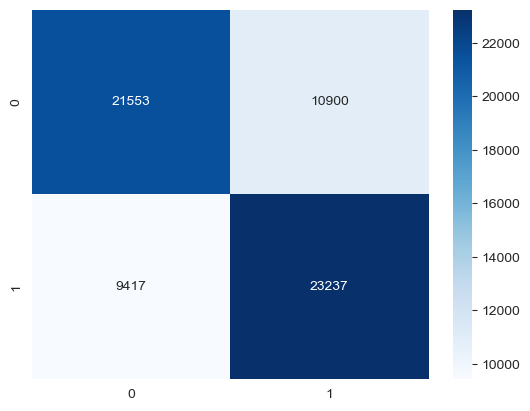

In [9]:
import seaborn as sns

y_pred = cross_val_predict(log, X, y, cv=5)
sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap='Blues', fmt='g')